**Part 1 ‑ Exploratory data analysis**

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Load JSON: json_data
with open("logins.json") as json_file:
    login_data = json.load(json_file)

# Print each key-value pair in json_data
#for k in login_data.keys():
    #print(k + ': ', login_data[k])

In [3]:
login_df = pd.DataFrame.from_dict(login_data,dtype='datetime64[ns]')
login_df['count']=1

#Group by to make the login_time unique
login_df=login_df.groupby(['login_time']).agg({'count':np.sum})

In [4]:
#Aggregate based on 15 minutes of the hour
login_df1 = login_df.resample('15T').sum()
login_df1['weekday_name']=login_df1.index.weekday_name
login_df1['minute']=login_df1.index.minute

#group by at weekday and minute interval
login_df1 = login_df1.groupby(['weekday_name','minute'],as_index=False).agg({'count':np.sum})

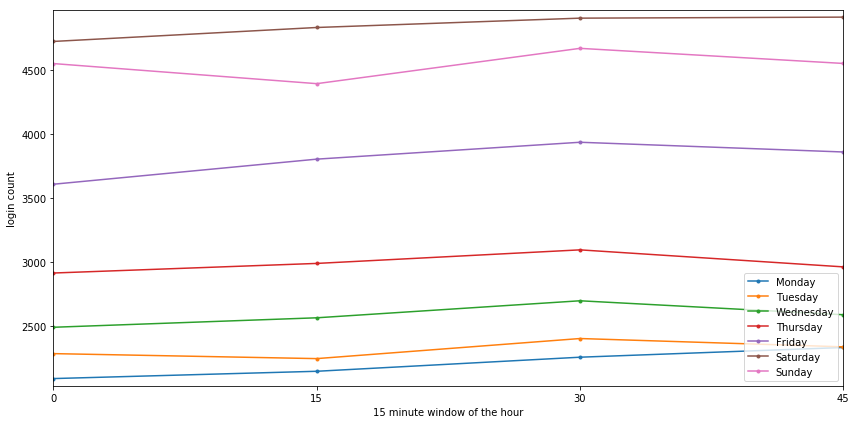

In [5]:
plt.figure(figsize=(12,6))
_ = plt.plot(login_df1[login_df1.weekday_name=='Monday']['minute'], login_df1[login_df1.weekday_name=='Monday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Tuesday']['minute'], login_df1[login_df1.weekday_name=='Tuesday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Wednesday']['minute'], login_df1[login_df1.weekday_name=='Wednesday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Thursday']['minute'], login_df1[login_df1.weekday_name=='Thursday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Friday']['minute'], login_df1[login_df1.weekday_name=='Friday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Saturday']['minute'], login_df1[login_df1.weekday_name=='Saturday']['count'],marker='.')
_ = plt.plot(login_df1[login_df1.weekday_name=='Sunday']['minute'], login_df1[login_df1.weekday_name=='Sunday']['count'],marker='.')
_ = plt.margins(.02)
_ = plt.xlim(0,45)
_ = plt.xticks([0,15,30,45])
# Label the axes
plt.xlabel('15 minute window of the hour')
plt.ylabel('login count')
plt.legend(('Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), loc='lower right')
plt.tight_layout()
plt.show()

**From the plot above**:
* its clear that the weekend has more login activity than the weekdays
* Among the weekdays, Friday has the highest activity and monday has the least activity
* It appears that 3rd quarter of the hour (30-45) has the highest activity across all weekdays except Monday

In [6]:
#Aggregate based on 15 minutes of the hour
login_df2 = login_df.resample('6H').sum()
login_df2['weekday_name']=login_df2.index.weekday_name
login_df2['hour']=login_df2.index.hour

#group by at weekday and minute interval
login_df2 = login_df2.groupby(['weekday_name','hour'],as_index=False).agg({'count':np.sum})

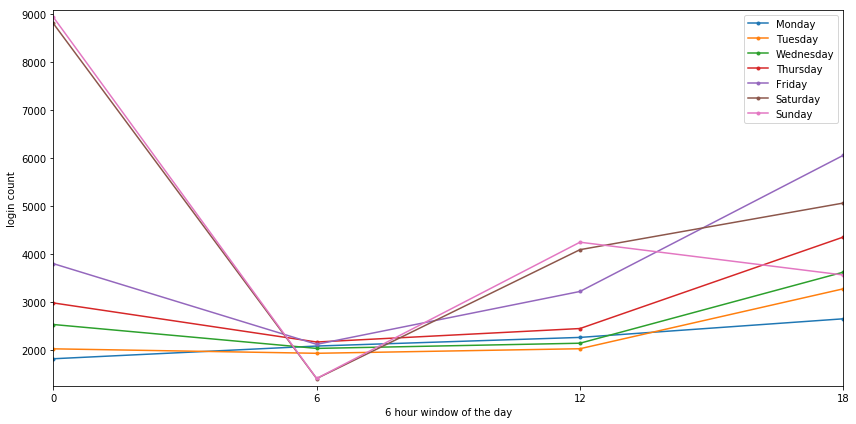

In [7]:
plt.figure(figsize=(12,6))
_ = plt.plot(login_df2[login_df2.weekday_name=='Monday']['hour'], login_df2[login_df2.weekday_name=='Monday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Tuesday']['hour'], login_df2[login_df2.weekday_name=='Tuesday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Wednesday']['hour'], login_df2[login_df2.weekday_name=='Wednesday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Thursday']['hour'], login_df2[login_df2.weekday_name=='Thursday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Friday']['hour'], login_df2[login_df2.weekday_name=='Friday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Saturday']['hour'], login_df2[login_df2.weekday_name=='Saturday']['count'],marker='.')
_ = plt.plot(login_df2[login_df2.weekday_name=='Sunday']['hour'], login_df2[login_df2.weekday_name=='Sunday']['count'],marker='.')
_ = plt.margins(.02)
_ = plt.xlim(0,18)
_ = plt.xticks([0,6,12,18])
# Label the axes
plt.xlabel('6 hour window of the day')
plt.ylabel('login count')
plt.legend(('Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), loc='upper right')
plt.tight_layout()
plt.show()

**From the plot above**:
* The peak activity happens on weekednds during 12am-6am window.
* Least active during 6am-12pm window on weekends 
* Most active evening (6pm-12am) is on Fridays and most active after noon (12pm-6pm) is on the weekends 
* All working days (non-weekend) have most activity in the evening (6pm-12am) window (after office hours)
* Overall, login activity is consistent with people's leisure time or non-office hours, except on weekends when people tend to sleep in late the morning. 

**Part 2 ‑ Experiment and metrics design**

* Metric can be the difference in number of trips completed between Gotham & Metropolis (origin in Gotham & destination in Metropolis or vice-versa) per driver before and after the experiment
* Pick a random sample of drivers from both cities and subject them to the experiement 
* Measure the number of trips completed between these cities per driver after rolling out the experiment
* Conduct hypothesis testing to validate statistical significance (set significance level) of the metrics (difference in trips completed per driver between these cities)
* Can use bootstrap method or bayesian inference to do the hypothesis testing 
* If the metrics is statistically signifcant in a positive way, then we can analyze further to see the cost/benefit and decide whether to roll out to all drivers in the city 

**Part 3 ‑ Predictive modeling**

In [8]:
# Load JSON: json_data
with open("ultimate_data_challenge.json") as json_file:
    challenge_data = json.load(json_file)

# Print each key-value pair in json_data
#for k in login_data.keys():
    #print(k + ': ', login_data[k])

challenge_df = pd.DataFrame.from_dict(challenge_data)

In [9]:
challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [10]:
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [11]:
#Convert dates to datetime and create a column for number of days since last trip, as of 6 months after signup
challenge_df['signup_date_date'] = pd.to_datetime(challenge_df['signup_date'], errors='coerce').dt.floor('d')
challenge_df['last_trip_date_date'] = pd.to_datetime(challenge_df['last_trip_date'], errors='coerce').dt.floor('d')
challenge_df['days_since_last_trip']=((challenge_df['signup_date_date']+pd.DateOffset(months=6))-challenge_df['last_trip_date_date']).dt.days

In [12]:
challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_date,last_trip_date_date,days_since_last_trip
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-01-25,2014-06-17,38
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-01-29,2014-05-05,85
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-06,2014-01-07,180
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-01-10,2014-06-29,11
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-01-27,2014-03-15,134


In [13]:
#Create label: reatined or not. If number of days_since_last_trip <=30 then Yes else No.
challenge_df['retained']=challenge_df['days_since_last_trip'] <= 30

In [14]:
challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_date,last_trip_date_date,days_since_last_trip,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-01-25,2014-06-17,38,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-01-29,2014-05-05,85,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-06,2014-01-07,180,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-01-10,2014-06-29,11,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-01-27,2014-03-15,134,False


In [15]:
#drop unnecessary fields
challenge_df = challenge_df.drop(['signup_date','last_trip_date','signup_date_date','last_trip_date_date','days_since_last_trip'],axis=1)

In [16]:
challenge_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,False


In [17]:
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null bool
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


**Exploratory Data Analysis (EDA)**

In [18]:
challenge_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [19]:
#Replace null values for phone with most frequent value
challenge_df.loc[challenge_df['phone'].isna(),'phone']='iPhone'

In [20]:
challenge_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

* Winterfell had most signups and King's Landing had the least

In [21]:
challenge_df.groupby('retained').size()

retained
False    37802
True     12198
dtype: int64

* 24.4% of customers were active or retained 6 months after signed up 

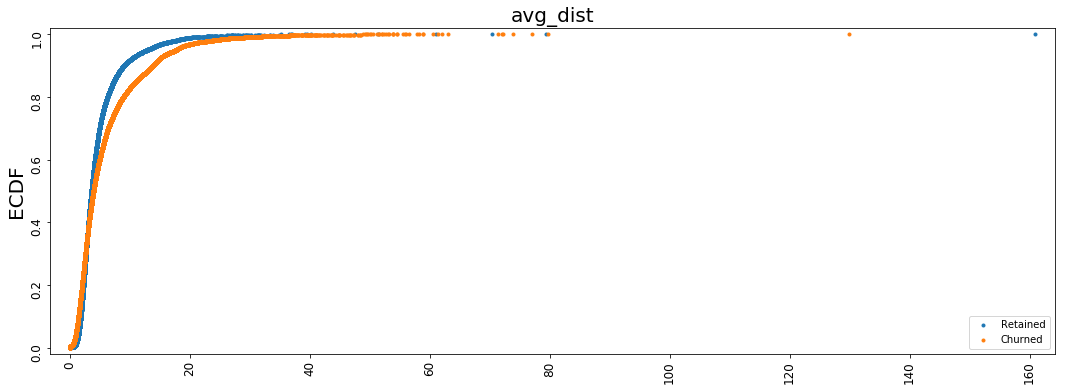

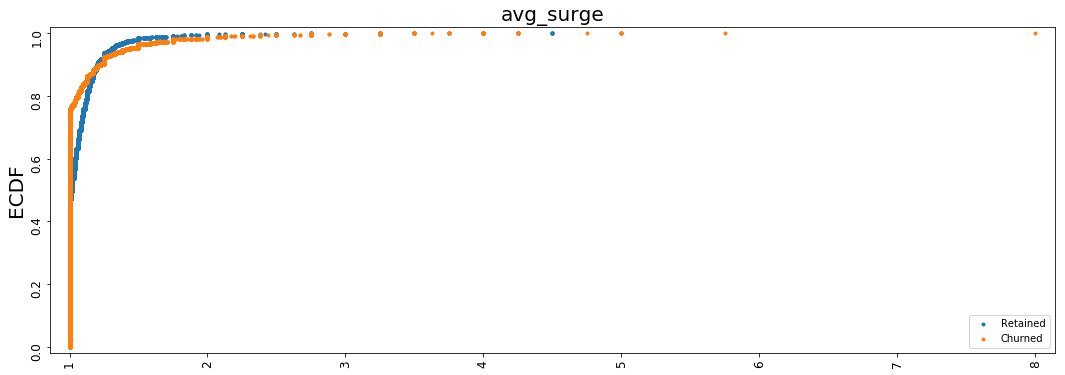

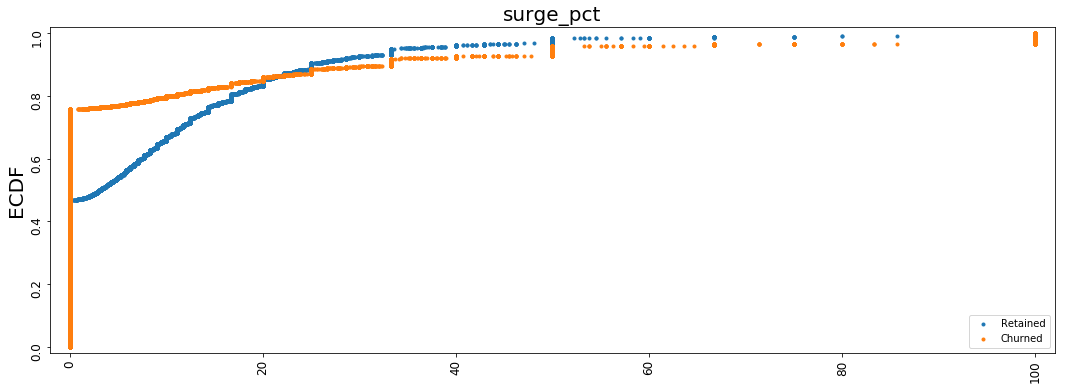

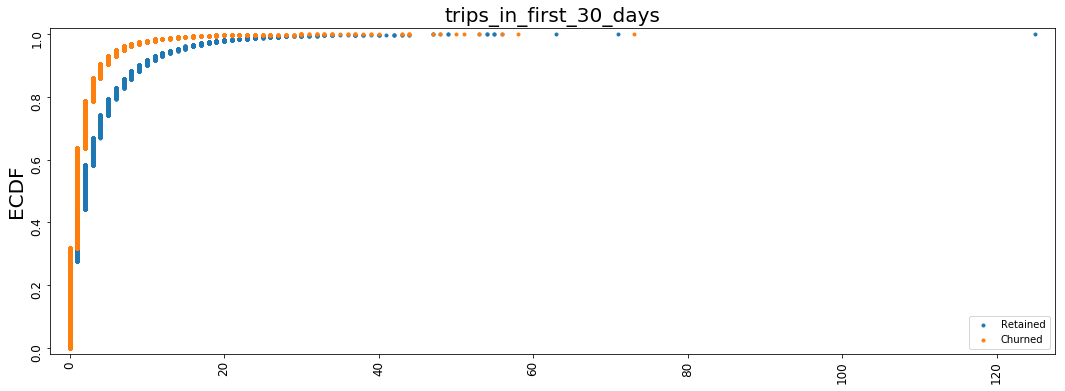

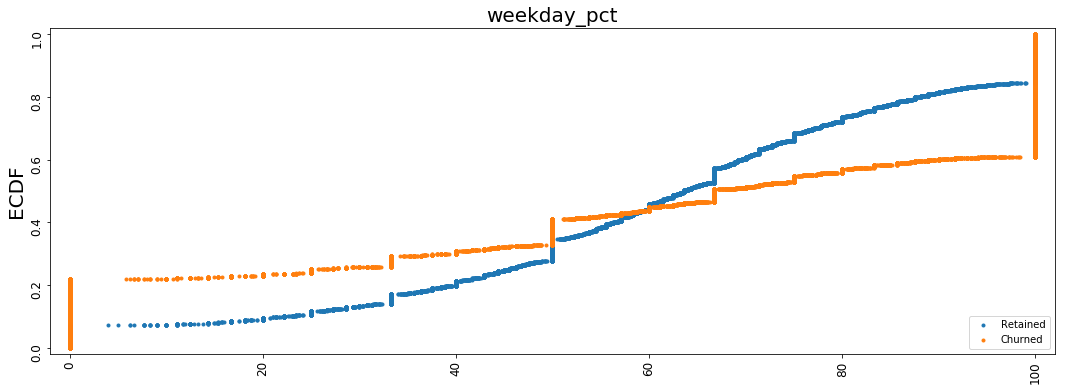

In [22]:
#Plot numerical features as ECDF (Empirical cumulative distribution function) curves to see their distribution in the dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

for f in ['avg_dist', 'avg_surge','surge_pct', 'trips_in_first_30_days', 'weekday_pct']:
    x_plt1, y_plt1 = ecdf(challenge_df[challenge_df.retained==1][f])
    x_plt2, y_plt2 = ecdf(challenge_df[challenge_df.retained==0][f])
    # Generate plot
    _ = plt.rcParams['figure.figsize']=(18,6)
    _ = plt.ylabel('ECDF',fontsize=20)
    _ = plt.xticks(rotation=90,fontsize=12)
    _ = plt.yticks(rotation=90,fontsize=12)
    _ = plt.title(f,fontsize=20)
    _ = plt.plot(x_plt1, y_plt1,marker='.',linestyle='none')
    _ = plt.plot(x_plt2, y_plt2,marker='.',linestyle='none')
    # Make the margins nice
    _ = plt.margins(.02)
    plt.legend(('Retained', 'Churned'), loc='lower right')
    
    # Display the plot
    plt.show()

In [23]:
print(challenge_df.groupby('phone').mean()['retained'],'\n')
print(challenge_df.groupby('city').mean()['retained'],'\n')
print(challenge_df.groupby(['phone','city']).mean()['retained'])

phone
Android    0.128212
iPhone     0.293670
Name: retained, dtype: float64 

city
Astapor           0.163058
King's Landing    0.397927
Winterfell        0.234445
Name: retained, dtype: float64 

phone    city          
Android  Astapor           0.070557
         King's Landing    0.265412
         Winterfell        0.122665
iPhone   Astapor           0.206023
         King's Landing    0.441300
         Winterfell        0.285127
Name: retained, dtype: float64


In [24]:
print(challenge_df.groupby('city').mean()['avg_rating_of_driver'],'\n')
print(challenge_df.groupby('city').mean()['avg_rating_by_driver'],'\n')

city
Astapor           4.630593
King's Landing    4.706997
Winterfell        4.532996
Name: avg_rating_of_driver, dtype: float64 

city
Astapor           4.798853
King's Landing    4.853162
Winterfell        4.730909
Name: avg_rating_by_driver, dtype: float64 



In [25]:
print(challenge_df.groupby('city').mean()['avg_surge'],'\n')
print(challenge_df.groupby('city').mean()['surge_pct'],'\n')

city
Astapor           1.086522
King's Landing    1.070707
Winterfell        1.068194
Name: avg_surge, dtype: float64 

city
Astapor           10.140305
King's Landing     9.966979
Winterfell         7.449927
Name: surge_pct, dtype: float64 



In [26]:
challenge_df.groupby('retained').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
retained,,,,,,,,
False,6.094451,4.783834,4.60488,1.073972,8.656285,1.836887,0.333263,60.809851
True,4.874479,4.760619,4.59260,1.077217,9.448426,3.645844,0.512871,61.286293


* iphone users had higher average retention than android users
* Users from King's landing had the highest retention & Astapor the lowest
* iphone users in King's Landing had the highest retention & Android users in Astapor had the lowest
* Riders & Drivers from King's landing are the most happy with their couterparts
* Astapor has the highest average surge multiplier & the highest average surge_pct
* Average distance per trip in 1st 30 days for churned customers was higher than that of retained customers  
* Retained customers had a higher average surge percentage
* Churned customers had lower number of trips in the 1st 30 days than retained customers

** Looks like churned customers are mostly those that used the service for a short period of time due to a specific event in their life; for example, their car is under repair or moved to a new place and dont have car or work related usage. These are people that wont use the service on a regualr basis.**

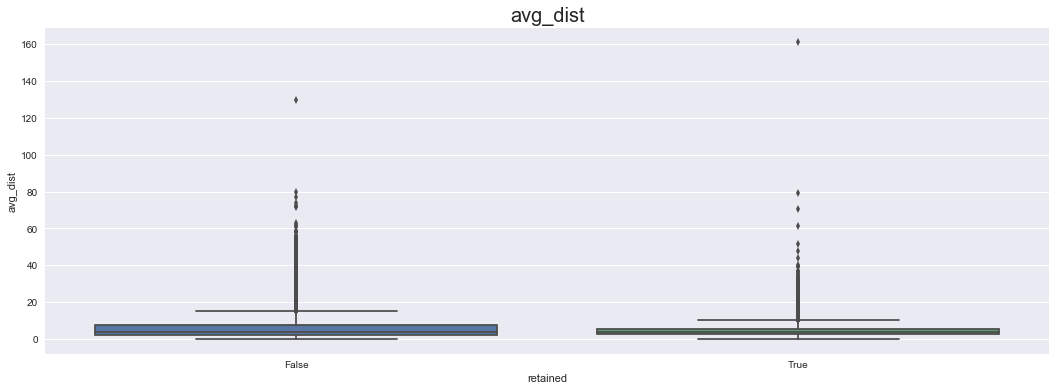

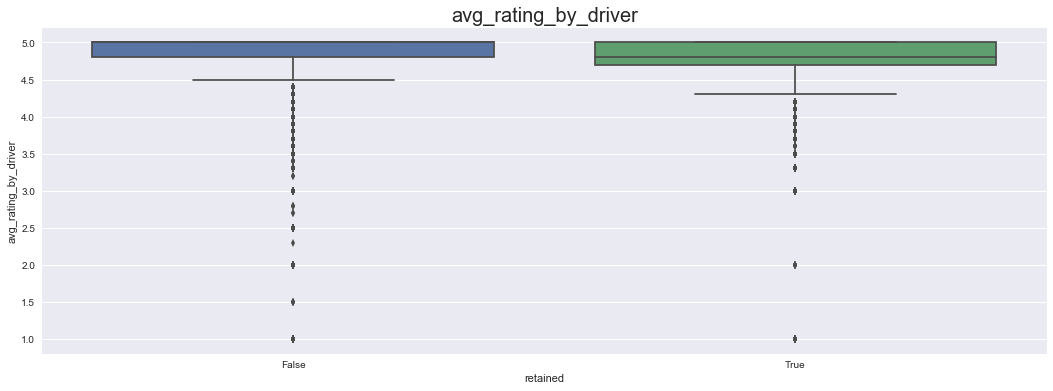

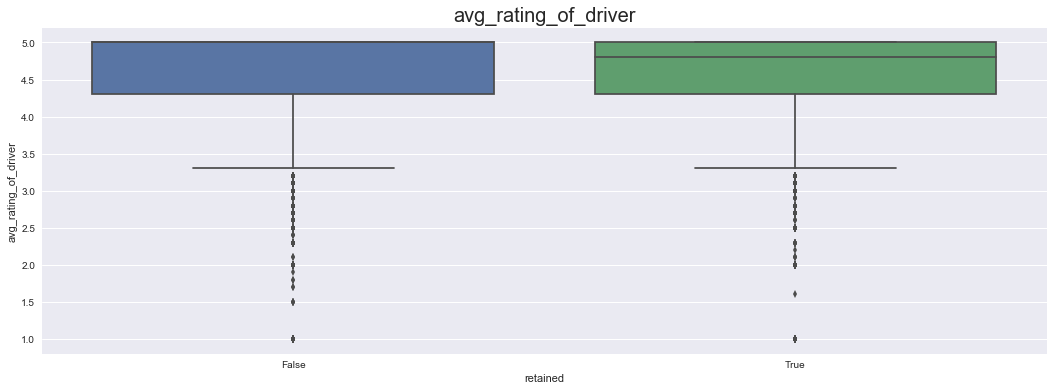

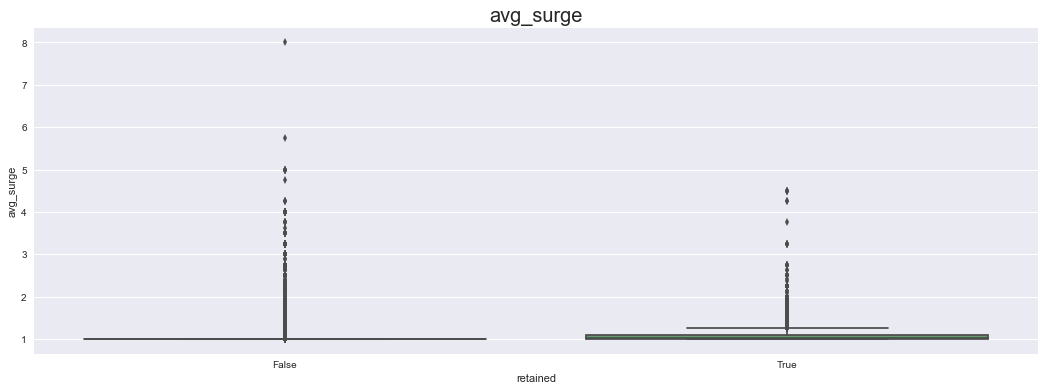

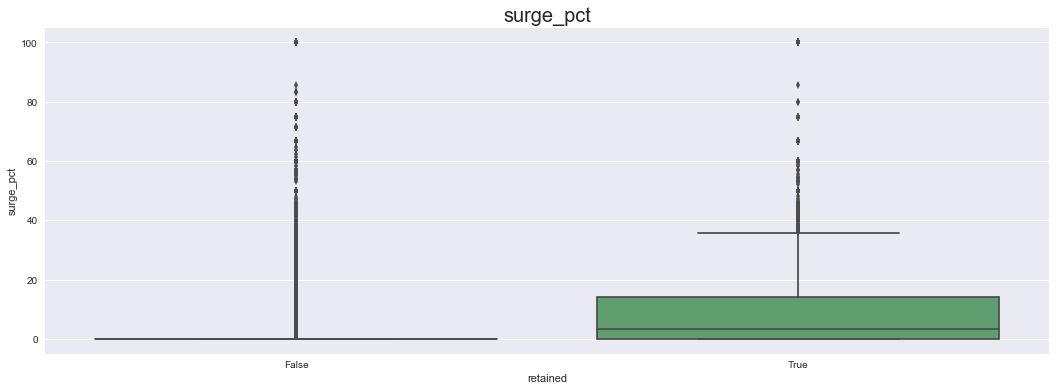

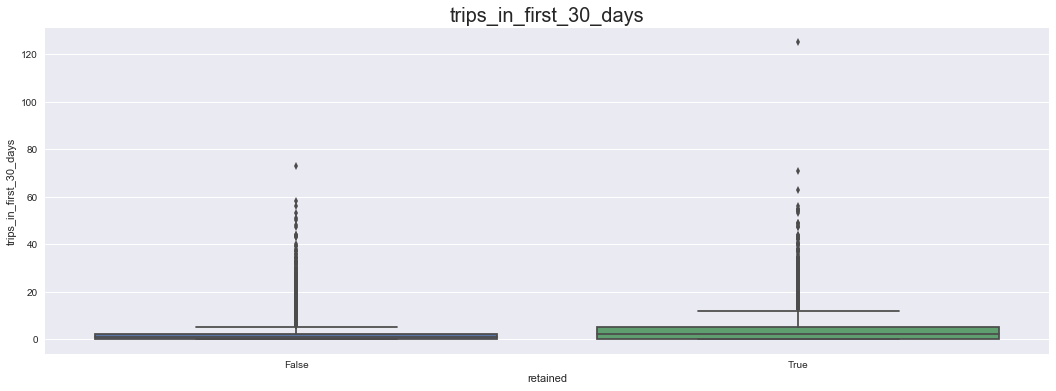

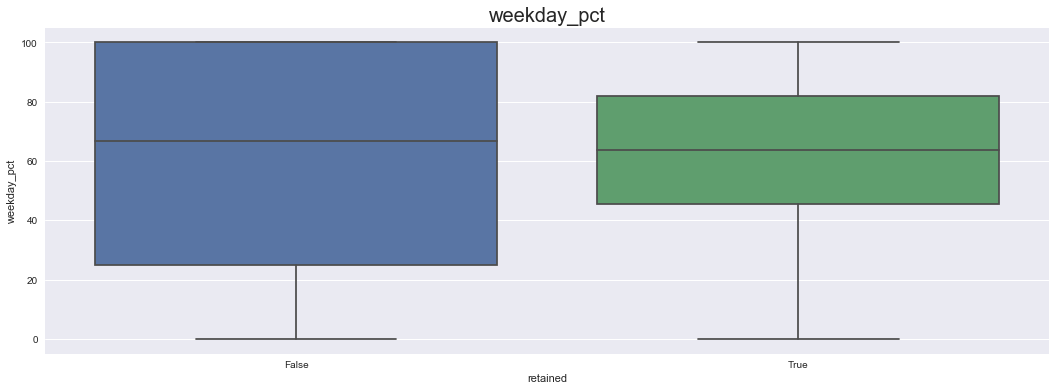

In [27]:
#Boxplot to identify outliers
import seaborn as sns; sns.set()
for f in ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct', 'trips_in_first_30_days'
          ,'weekday_pct']:
    _ = plt.title(f,fontsize=20)
    _ = sns.boxplot(x='retained', y=f, data=challenge_df)
    _ = plt.xlabel('retained')
    _ = plt.ylabel(f)
    plt.show()

* There are few points in the box plot for 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct', and 'trips_in_first_30_days' that look like outliers, which requires further investigation

**Modeling**

In [28]:
#Encode using one-hot encoding
challenge_df=pd.concat([challenge_df,pd.get_dummies(challenge_df['city'],prefix=['city'])],axis=1)
challenge_df=pd.concat([challenge_df,pd.get_dummies(challenge_df['trips_in_first_30_days'],prefix=['trips_in_first_30_days'])],axis=1)
#Drop encoded columns from the dataset
challenge_df=challenge_df.drop(['city'],axis=1)
challenge_df=challenge_df.drop(['trips_in_first_30_days'],axis=1)

In [29]:
#Create a category column to use for stratified shuffle split of dataset
challenge_df["weekday_cat"] = np.ceil(challenge_df["weekday_pct"] / 25) 
challenge_df["weekday_cat"]. where(challenge_df["weekday_cat"] < 5, 5.0, inplace = True)

# Check the Distribution in the entire dataset
challenge_df['weekday_cat'].value_counts() / len(challenge_df)

4.0    0.41764
3.0    0.18650
0.0    0.18406
2.0    0.17646
1.0    0.03534
Name: weekday_cat, dtype: float64

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42) 
for train_index, test_index in split.split(challenge_df, challenge_df["weekday_cat"]): 
    strat_train_set = challenge_df.loc[train_index] 
    strat_test_set = challenge_df.loc[test_index]
    

#Check the Distribution in the test dataset
strat_test_set['weekday_cat'].value_counts() / len(strat_test_set)

4.0    0.4176
3.0    0.1865
0.0    0.1841
2.0    0.1765
1.0    0.0353
Name: weekday_cat, dtype: float64

In [31]:
#Drop weekday_cat column
for set_ in (strat_train_set, strat_test_set): 
    set_. drop("weekday_cat", axis = 1, inplace = True)

#Make a copy of train & test dataset
DataSet_train = strat_train_set.copy()
DataSet_test = strat_test_set.copy()

In [32]:
#Split feature and label
DataSet_train = strat_train_set.drop("retained", axis = 1) 
DataSet_train_labels = strat_train_set["retained"]. copy()

DataSet_test = strat_test_set.drop("retained", axis = 1) 
DataSet_test_labels = strat_test_set["retained"]. copy()

In [33]:
#Convert string to category datatype
Cat_columns = ['phone','ultimate_black_user']

for c in Cat_columns:
    DataSet_train[c] = DataSet_train[c].astype('category')
    

Cat_columns_test = ['phone','ultimate_black_user']

for c in Cat_columns_test:
    DataSet_test[c] = DataSet_test[c].astype('category')

In [34]:
#Create a dataset containing only numerical features

object_columns = list(DataSet_train.dtypes[DataSet_train.dtypes == 'object'].index)
category_columns = list(DataSet_train.dtypes[DataSet_train.dtypes == 'category'].index)

DataSet_train_num = DataSet_train.drop(object_columns, axis=1)
DataSet_train_num = DataSet_train.drop(category_columns, axis=1)


object_columns = list(DataSet_test.dtypes[DataSet_test.dtypes == 'object'].index)
category_columns = list(DataSet_test.dtypes[DataSet_test.dtypes == 'category'].index)

DataSet_test_num = DataSet_test.drop(object_columns, axis=1)
DataSet_test_num = DataSet_test.drop(category_columns, axis=1)

In [35]:
#Create a dataset containing only categorical features

DataSet_train_cat = DataSet_train.loc[:,Cat_columns]
DataSet_test_cat = DataSet_test.loc[:,Cat_columns_test]

In [36]:
#Convert category column to numercial factors
for c in Cat_columns:
    DataSet_train[c],_ = DataSet_train[c].factorize()
    
for c in Cat_columns_test:
    DataSet_test[c],_ = DataSet_test[c].factorize()

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
#Create pipelines for preparing numerical & categorical attributes

# Numerical attributes:
    #Impute (replace) missing numerical attributes with their median
    # Scale the numerical attributes using StandardScaler()

#Categorical attributes:
    #One hot encoding for categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(DataSet_train_num)
cat_attribs = list(DataSet_train_cat)

num_attribs_test = list(DataSet_test_num)
cat_attribs_test = list(DataSet_test_cat)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

num_pipeline_test = Pipeline([
        ('selector', DataFrameSelector(num_attribs_test)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline_test = Pipeline([
        ('selector', DataFrameSelector(cat_attribs_test)),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

In [39]:
#join the pipelines and prepare the final train dataset for model training
from  sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

DataSet_train_prepared = full_pipeline.fit_transform(DataSet_train)
DataSet_train_prepared.shape

(40000, 72)

In [40]:
#join the pipelines and prepare the final test dataset for model training
from  sklearn.pipeline import FeatureUnion

full_pipeline_test = FeatureUnion(transformer_list=[
        ("num_pipeline_test", num_pipeline_test),
        ("cat_pipeline_test", cat_pipeline_test),
    ])

DataSet_test_prepared = full_pipeline.fit_transform(DataSet_test)
DataSet_test_prepared.shape

(10000, 72)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

forest_cl = RandomForestClassifier(random_state=42)
svm_cl_linearSVC = LinearSVC(random_state=42)
logistic = linear_model.LogisticRegression(random_state=42)

models = [forest_cl, svm_cl_linearSVC, logistic]
for m in models:
    m.fit(DataSet_train_prepared, DataSet_train_labels)
    score = cross_val_score(m, DataSet_train_prepared, DataSet_train_labels, scoring="accuracy", cv=10,n_jobs=-1)
    print(m,': ', '\n','Mean of Accuracy: ', score.mean(), ', ', 'Standard Deviation of Accuracy: ', score.std(), '\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) :  
 Mean of Accuracy:  0.7646750000000001 ,  Standard Deviation of Accuracy:  0.004527761588246441 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0) :  
 Mean of Accuracy:  0.766975 ,  Standard Deviation of Accuracy:  0.0027736483194522 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=

In [42]:
#Finding the best parameter C for logistic
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 7
random_search = RandomizedSearchCV(logistic,param_distributions=param_grid,n_iter=n_iter_search,cv=5,random_state=42,n_jobs=-1)
random_search.fit(DataSet_train_prepared,DataSet_train_labels)

print('Best score : ', '\n',random_search.best_score_)
print('Best parameters : ', '\n',random_search.best_estimator_)

Best score :  
 0.7691
Best parameters :  
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [43]:
#Finding the best parameter C for linearSVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 7
random_search = RandomizedSearchCV(svm_cl_linearSVC,param_distributions=param_grid,n_iter=n_iter_search,cv=5,random_state=42
                                   ,n_jobs=-1)
random_search.fit(DataSet_train_prepared,DataSet_train_labels)

print('Best score : ', '\n',random_search.best_score_)
print('Best parameters : ', '\n',random_search.best_estimator_)

Best score :  
 0.76885
Best parameters :  
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)


In [44]:
#Finding the best parameters for RandomForest

# specify parameters and distributions to sample from
param_dist = {"max_features": range(1, DataSet_test_prepared.shape[1]+1)
              ,"bootstrap": [True, False]
              ,"criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(forest_cl, param_distributions=param_dist,n_iter=n_iter_search)
random_search.fit(DataSet_train_prepared,DataSet_train_labels)

print('Best score : ', '\n',random_search.best_score_)
print('Best parameters : ', '\n',random_search.best_estimator_)

Best score :  
 0.7697
Best parameters :  
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=58, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


* We pick RandomForest as the final model, as the accuracy is almost the same among all 3 models we checked and RandomForest is the fastest (sclaes well) and it has more hyper parameters for us to tune to get a better performance. 

In [45]:
final_model = random_search.best_estimator_
final_model.fit(DataSet_train_prepared, DataSet_train_labels)
score = cross_val_score(final_model, DataSet_train_prepared, DataSet_train_labels, scoring="accuracy", cv=10,n_jobs=-1)
print(final_model,': ', '\n','Mean of Accuracy: ', score.mean(), ', ', 'Standard Deviation of Accuracy: ', score.std(), '\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=58, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) :  
 Mean of Accuracy:  0.7689499999999999 ,  Standard Deviation of Accuracy:  0.005218716317256563 



In [46]:
#Testing model on the test set
from sklearn.metrics import confusion_matrix
confusion_matrix(DataSet_test_labels, final_model.predict(DataSet_test_prepared))

array([[7004,  508],
       [1936,  552]], dtype=int64)

In [47]:
#Test performance of the model
from sklearn.metrics import classification_report
print('Accuracy:',final_model.score(DataSet_test_prepared, DataSet_test_labels),'\n')
print(classification_report(DataSet_test_labels, final_model.predict(DataSet_test_prepared)))

Accuracy: 0.7556 

             precision    recall  f1-score   support

      False       0.78      0.93      0.85      7512
       True       0.52      0.22      0.31      2488

avg / total       0.72      0.76      0.72     10000



* Even though the accuracy on the test data is not so good (76%); 93% recall for for 'False' class (not active or churned customers) is good. This means that, if our goal was to accurately predict all of the customers that are going to churn, then this model does it for 93% of the time. 

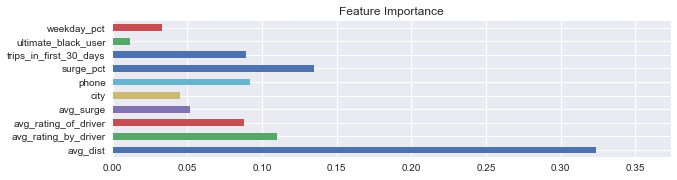

In [48]:
# find feature importance
feature_dict = dict(zip(DataSet_train.columns, final_model.feature_importances_))

#Summarize the encoded (dummy) columns
for col_name in ['trips_in_first_30_days','city']:
    sum_value = sum(x for i, x in feature_dict.items() if col_name in i)
    keys_to_remove = [i for i in feature_dict.keys() if col_name in i]
    for i in keys_to_remove:
        feature_dict.pop(i)
    feature_dict[col_name] = sum_value

results = pd.DataFrame(feature_dict,index=range(len(feature_dict))).loc[0,:]

#Plot feature importance
width=10
headroom=0.05
x_scale = final_model.feature_importances_.max()+ headroom
results.plot(kind='barh', figsize=(width,len(results)/4), xlim=(0,x_scale),title='Feature Importance')
plt.show()

**Conclusion**
* As shown above, avg_dist ( the average distance in miles per trip taken in the first 30 days after signup) is the most important feature in predicting the customer retention after 6 months and whether the user took an Ultimate Black in their first 30 days or not doesnt contribute much to predicting the retetion after 6 months
* Try to re-do the model after removing the least important features and see if the model performance changes
* Analyze the outliers in the dataset and possibly clean the dataset further, this can improve the model perfromance
* The model is underfitting (not complext enough), so we need to add more features to the dataset
* Also, there is scope for some marketing/promotional campaigns in the city of Astapor for attracting more drivers & riders and to improve retention (See EDA section for Astapor in comparison to other cities)